In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

Rsol = 6.96e8  # Solar radius in cm
au = 1.5e11    # 1 AU in cm

output_directory = "/Users/leonardogacituasantos/exoplanet_photosynthesis/new_data/"

def movingaverage(interval, window_size):
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(interval, window, 'same')

def reduce_by_interpolation(spectrum, newsize=1000):
    rows, cols = spectrum.shape
    if rows <= newsize:
        print(f"Warning: Data already less than {newsize} points; no reduction performed")
        return spectrum

    xnew = np.linspace(spectrum[:, 0].min(), spectrum[:, 0].max(), newsize)
    ynew = np.interp(xnew, spectrum[:, 0], spectrum[:, 1])
    return np.column_stack((xnew, ynew))

# Data Loading
wavelengths = fits.getdata("/Users/leonardogacituasantos/exoplanet_photosynthesis/data_files/raw_data/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits")
fluxes = fits.getdata("/Users/leonardogacituasantos/exoplanet_photosynthesis/data_files/raw_data/lte03500-5.00-1.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

#np.savetxt(output_directory + "raw_stellar_spectrum.txt", np.c_[wavelengths, fluxes])

# Smoothing and Reducing Data
smoothed = movingaverage(fluxes, 30000)
reduced = reduce_by_interpolation(np.c_[wavelengths, smoothed], newsize=4000)
#np.savetxt(output_directory + "processed_stellar_spectrum.txt", np.c_[reduced[:, 0], reduced[:, 1]])

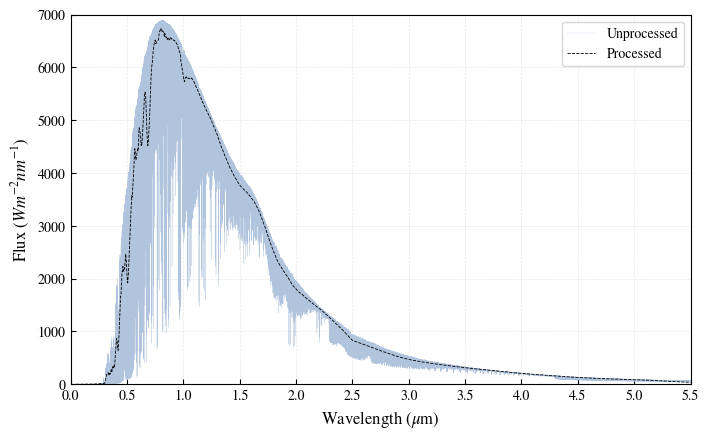

In [12]:
# Plotting the data
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

plt.figure(figsize=(8, 4.8))

# Plotting the original spectrum
plt.plot(wavelengths/10000, 
         fluxes/1e10, 
         label="Unprocessed", 
         color='lightsteelblue', 
         linestyle='-',
         linewidth=0.2)

# Plotting the processed spectrum
plt.plot(reduced[:, 0]/10000, 
         reduced[:, 1]/1e10, 
         label="Processed", 
         color='k', 
         linestyle='--',
         linewidth=0.6)

# Adding labels and title
plt.xlabel("Wavelength ($\mu$m)", fontsize=12)
plt.ylabel("Flux ($W m^{-2} nm^{-1}$)", fontsize=12)

# Setting axis limits
plt.xlim(0, 5.5)
plt.ylim(0, 7000)

# Adding legend
plt.legend()

# Customizing the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)

# Setting tick parameters
tick_spacing = 0.5
ax = plt.gca()
ax.tick_params(direction="in")
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# Saving the plot
#plt.savefig('/Users/leonardogacituasantos/exoplanet_photosynthesis/jupyter_notebooks/Figures for report/Stellar_Spectrum.jpg', dpi=600, format='jpg')

# Showing the plot
plt.show()

In [3]:
processed_fluxes

NameError: name 'processed_fluxes' is not defined

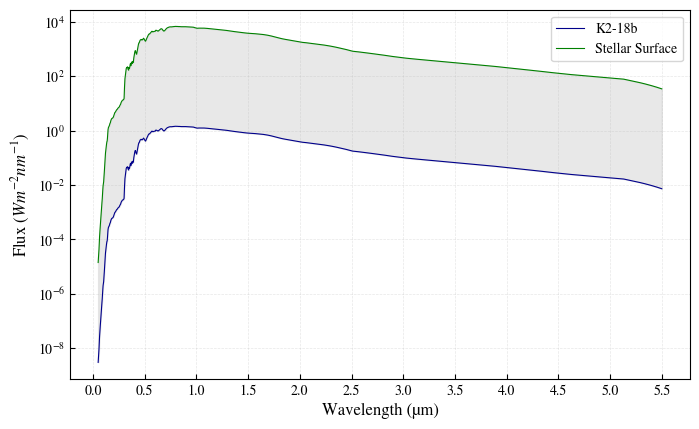

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import numpy as np


Rsol = 6.96e8  # Solar radius in cm
au = 1.5e11 # au in cm

# Extract wavelengths and fluxes
processed_wavelengths = reduced[:, 0]  # first column is wavelengths
processed_fluxes = reduced[:, 1]  # second column is flux at 1 au

flux_at_orbital_distance = processed_fluxes * ((0.469 * Rsol)/(0.1491 * au)) ** 2

# Setting up plot styles
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

plt.figure(figsize=(8, 4.8))

plt.fill_between(processed_wavelengths/10000, processed_fluxes/1e10, flux_at_orbital_distance/1e10, color='lightgrey', alpha=0.5)

# Plotting the flux at orbital distance
plt.plot(processed_wavelengths/10000, 
         flux_at_orbital_distance/1e10, 
         label="K2-18b", 
         color='darkblue', 
         linestyle='-', 
         linewidth=0.8)

# Plotting the processed flux
plt.plot(processed_wavelengths/10000, 
         processed_fluxes/1e10,  
         label="Stellar Surface", 
         color='green', 
         linestyle='-', 
         linewidth=0.8)

# Adding labels and title
plt.xlabel("Wavelength (µm)", fontsize=12)
plt.ylabel("Flux ($W m^{-2} nm^{-1}$)", fontsize=12)

# Use logarithmic scale for y-axis
plt.yscale('log')

# Adding legend
plt.legend()

# Customizing the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)

# Setting tick parameters
tick_spacing = 0.5
ax = plt.gca()
ax.tick_params(direction="in")
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

#plt.savefig('/Users/leonardogacituasantos/exoplanet_photosynthesis/jupyter_notebooks/Figures for report/Orbital_Spectrum.jpg', dpi=600, format='jpg')

# Showing the plot
plt.show()


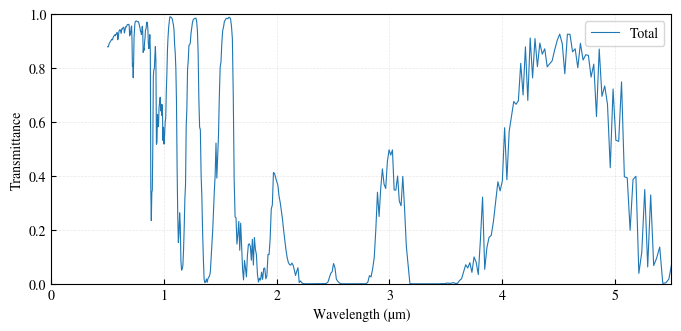

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import numpy as np

# Load the transmittance data
transmittance_file = "/Users/leonardogacituasantos/exoplanet_photosynthesis/data_files/raw_data/K2-18b_PSG_transmittance_spectrum.txt"
transmittance_data = np.loadtxt(transmittance_file, skiprows=6)

# Extract the wavelengths and transmittance values
transmittance_wavelengths = transmittance_data[:, 0]
total_transmittance = transmittance_data[:, 1]
H2_transmittance = transmittance_data[:, 2]
He_transmittance = transmittance_data[:, 3]
CH4_transmittance = transmittance_data[:, 4]
H2O_transmittance = transmittance_data[:, 5]
CO2_transmittance = transmittance_data[:, 6]
CO_transmittance = transmittance_data[:, 7]
Rayleigh_transmittance = transmittance_data[:, 8]
CIA_transmittance = transmittance_data[:, 9]

# Setting up plot styles
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

# Manually set the colors
colors = {
    "Total": "#1f77b4",   # Blue
    "H2": "#ff7f0e",      # Orange
    "He": "#2ca02c",      # Green
    "CH4": "#d62728",     # Red
    "H2O": "#9467bd",     # Purple
    "CO2": "#8c564b",     # Brown
    "CO": "#e377c2",      # Pink
    "Rayleigh": "#7f7f7f",# Grey
    "CIA": "#bcbd22"      # Yellow
}

# Create the figure and plot
plt.figure(figsize=(8, 3.5))
plt.plot(transmittance_wavelengths, total_transmittance, label='Total', color=colors["Total"], linewidth=0.8)
#plt.plot(transmittance_wavelengths, H2_transmittance, label='H₂', color=colors["H2"], linestyle='-', linewidth=0.8)
#plt.plot(transmittance_wavelengths, He_transmittance, label='He', color=colors["He"], linestyle='-', linewidth=0.8)
#plt.plot(transmittance_wavelengths, CH4_transmittance, label='CH₄', color=colors["CH4"], linestyle='-', linewidth=0.8)
#plt.plot(transmittance_wavelengths, H2O_transmittance, label='H₂O', color=colors["H2O"], linestyle='-', linewidth=0.8)
#plt.plot(transmittance_wavelengths, CO2_transmittance, label='CO₂', color=colors["CO2"], linestyle='-', linewidth=0.8)
#plt.plot(transmittance_wavelengths, CO_transmittance, label='CO', color=colors["CO"], linestyle='-', linewidth=0.8)
#plt.plot(transmittance_wavelengths, Rayleigh_transmittance, label='Rayleigh', color=colors["Rayleigh"], linestyle='-', linewidth=0.8)
#plt.plot(transmittance_wavelengths, CIA_transmittance, label='CIA', color=colors["CIA"], linestyle='-', linewidth=0.8)

plt.xlim(0, 5.5)
plt.ylim(0, 1)

# Add labels and legend
plt.xlabel('Wavelength (µm)')
plt.ylabel('Transmittance')
plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)

tick_spacing = 0.5
ax = plt.gca()
ax.tick_params(direction="in")

#plt.savefig('/Users/leonardogacituasantos/exoplanet_photosynthesis/jupyter_notebooks/Figures for report/Transmittance.jpg', dpi=600, format='jpg')


# Show the plot
plt.show()


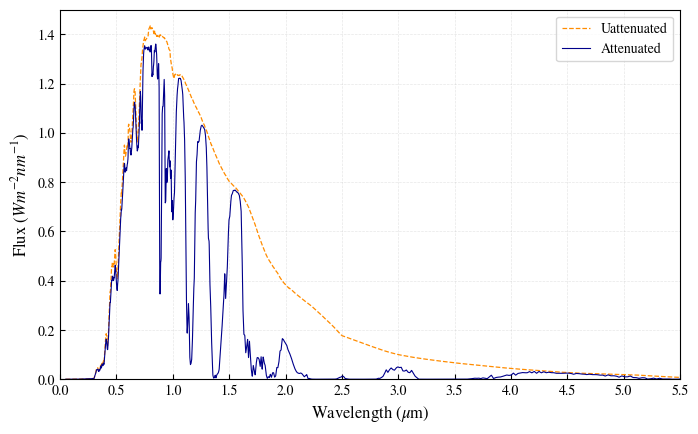

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load transmittance data
transmittance_wavelengths = transmittance_data[:, 0]
transmittance_values = transmittance_data[:, 1]               # total transmittance

# Interpolate transmittance onto the stellar spectrum wavelengths
interpolated_transmittance = np.interp(processed_wavelengths/10000, transmittance_wavelengths, transmittance_values)

# Apply transmittance to the stellar spectrum
attenuated_flux = flux_at_orbital_distance * interpolated_transmittance


plt.figure(figsize=(8, 4.8))

# Plotting the original spectrum
plt.plot(processed_wavelengths/10000, 
         flux_at_orbital_distance/1e10, 
         label="Uattenuated", 
         color='darkorange', 
         linestyle='--',
         linewidth=0.9)

# Plotting the processed spectrum
plt.plot(processed_wavelengths/10000, 
         attenuated_flux/1e10, 
         label="Attenuated", 
         color='darkblue', 
         linestyle='-',
         linewidth=0.8)

# Adding labels and title
plt.xlabel("Wavelength ($\mu$m)", fontsize=12)
plt.ylabel("Flux ($W m^{-2} nm^{-1}$)", fontsize=12)

# Setting axis limits
plt.xlim(0, 5.5)
plt.ylim(0, 1.5)

# Adding legend
plt.legend()

# Customizing the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)

# Setting tick parameters
tick_spacing = 0.5
ax = plt.gca()
ax.tick_params(direction="in")
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# Saving the plot
#plt.savefig('/Users/leonardogacituasantos/exoplanet_photosynthesis/jupyter_notebooks/Figures for report/Attenuated_Spectrum.jpg', dpi=600, format='jpg')

# Showing the plot
plt.show()


In [ ]:
np.savetxt('/Users/leonardogacituasantos/exoplanet_photosynthesis/data_files/processed_data/new_atten_spectrum', np.c_[processed_wavelengths/10, attenuated_flux/1e10])

In [ ]:
np.savetxt('/Users/leonardogacituasantos/exoplanet_photosynthesis/data_files/processed_data/new_orb_spectrum', np.c_[processed_wavelengths/10, flux_at_orbital_distance/1e10])

/Users/leonardogacituasantos/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leonardogacituasantos/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


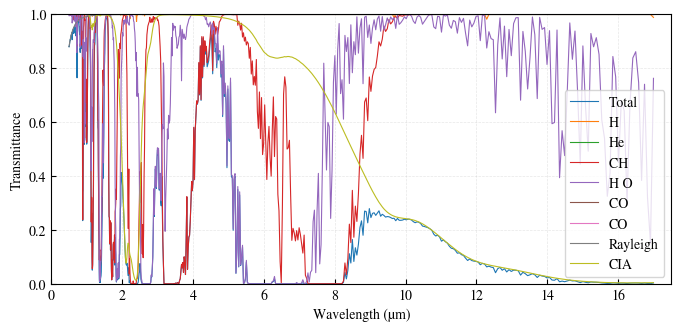

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import numpy as np

# Load the transmittance data
transmittance_file = "/Users/leonardogacituasantos/exoplanet_photosynthesis/data_files/raw_data/K2-18b_PSG_transmittance_spectrum.txt"
transmittance_data = np.loadtxt(transmittance_file, skiprows=6)

# Extract the wavelengths and transmittance values
transmittance_wavelengths = transmittance_data[:, 0]
total_transmittance = transmittance_data[:, 1]
H2_transmittance = transmittance_data[:, 2]
He_transmittance = transmittance_data[:, 3]
CH4_transmittance = transmittance_data[:, 4]
H2O_transmittance = transmittance_data[:, 5]
CO2_transmittance = transmittance_data[:, 6]
CO_transmittance = transmittance_data[:, 7]
Rayleigh_transmittance = transmittance_data[:, 8]
CIA_transmittance = transmittance_data[:, 9]

# Setting up plot styles
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

# Manually set the colors
colors = {
    "Total": "#1f77b4",   # Blue
    "H2": "#ff7f0e",      # Orange
    "He": "#2ca02c",      # Green
    "CH4": "#d62728",     # Red
    "H2O": "#9467bd",     # Purple
    "CO2": "#8c564b",     # Brown
    "CO": "#e377c2",      # Pink
    "Rayleigh": "#7f7f7f",# Grey
    "CIA": "#bcbd22"      # Yellow
}

# Create the figure and plot
plt.figure(figsize=(8, 3.5))
plt.plot(transmittance_wavelengths, total_transmittance, label='Total', color=colors["Total"], linewidth=0.8)
plt.plot(transmittance_wavelengths, H2_transmittance, label='H₂', color=colors["H2"], linestyle='-', linewidth=0.8)
plt.plot(transmittance_wavelengths, He_transmittance, label='He', color=colors["He"], linestyle='-', linewidth=0.8)
plt.plot(transmittance_wavelengths, CH4_transmittance, label='CH₄', color=colors["CH4"], linestyle='-', linewidth=0.8)
plt.plot(transmittance_wavelengths, H2O_transmittance, label='H₂O', color=colors["H2O"], linestyle='-', linewidth=0.8)
plt.plot(transmittance_wavelengths, CO2_transmittance, label='CO₂', color=colors["CO2"], linestyle='-', linewidth=0.8)
plt.plot(transmittance_wavelengths, CO_transmittance, label='CO', color=colors["CO"], linestyle='-', linewidth=0.8)
plt.plot(transmittance_wavelengths, Rayleigh_transmittance, label='Rayleigh', color=colors["Rayleigh"], linestyle='-', linewidth=0.8)
plt.plot(transmittance_wavelengths, CIA_transmittance, label='CIA', color=colors["CIA"], linestyle='-', linewidth=0.8)

plt.xlim(0, 17.5)
plt.ylim(0, 1)

# Add labels and legend
plt.xlabel('Wavelength (µm)')
plt.ylabel('Transmittance')
plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)

tick_spacing = 0.5
ax = plt.gca()
ax.tick_params(direction="in")


# Show the plot
plt.show()


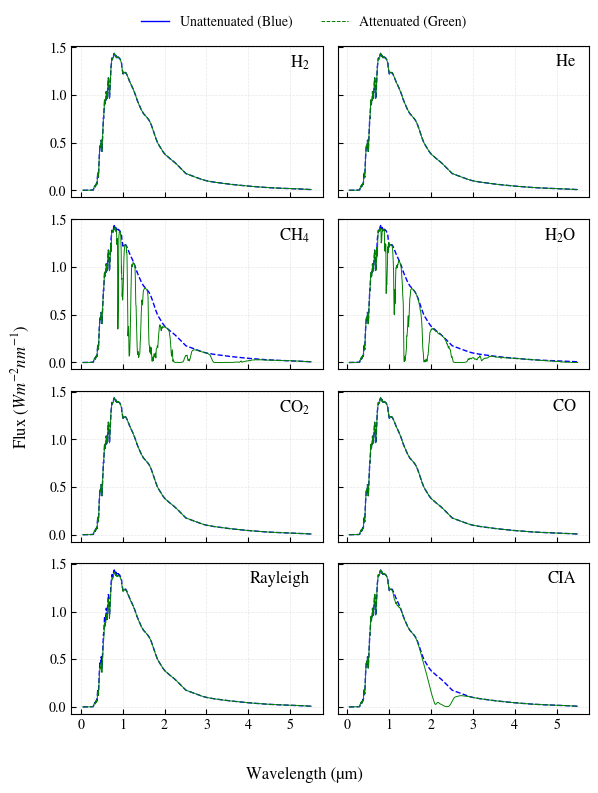

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import numpy as np

# Load the transmittance data
transmittance_file = "/Users/leonardogacituasantos/exoplanet_photosynthesis/data_files/raw_data/K2-18b_PSG_transmittance_spectrum.txt"
transmittance_data = np.loadtxt(transmittance_file, skiprows=6)

# Extract the wavelengths and individual transmittance values
transmittance_wavelengths = transmittance_data[:, 0]
H2_transmittance = transmittance_data[:, 2]
He_transmittance = transmittance_data[:, 3]
CH4_transmittance = transmittance_data[:, 4]
H2O_transmittance = transmittance_data[:, 5]
CO2_transmittance = transmittance_data[:, 6]
CO_transmittance = transmittance_data[:, 7]
Rayleigh_transmittance = transmittance_data[:, 8]
CIA_transmittance = transmittance_data[:, 9]

# Setting up plot styles
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

# Manually set the colors
colors = {
    "Unattenuated": "blue",      # Blue for unattenuated flux
    "Attenuated": "green"  # Green for attenuated flux
}

# Data and labels with LaTeX formatting
transmittance_list = [
    (H2_transmittance, r"$\mathrm{H}_2$"),
    (He_transmittance, r"$\mathrm{He}$"),
    (CH4_transmittance, r"$\mathrm{CH}_4$"),
    (H2O_transmittance, r"$\mathrm{H_2O}$"),
    (CO2_transmittance, r"$\mathrm{CO}_2$"),
    (CO_transmittance, r"$\mathrm{CO}$"),
    (Rayleigh_transmittance, "Rayleigh"),
    (CIA_transmittance, "CIA")
]

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(6, 8), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the 2D array for easy iteration

# Plot each transmittance
for i, (transmittance, label) in enumerate(transmittance_list):
    ax = axes[i]

    # Interpolate transmittance onto the stellar spectrum wavelengths
    interpolated_transmittance = np.interp(processed_wavelengths / 10000, transmittance_wavelengths, transmittance)

    # Apply transmittance to the stellar spectrum
    attenuated_flux = flux_at_orbital_distance * interpolated_transmittance

    # Plot unattenuated and attenuated flux
    ax.plot(processed_wavelengths / 10000, flux_at_orbital_distance/1e10, color=colors["Unattenuated"], linewidth=1, linestyle='--')
    ax.plot(processed_wavelengths / 10000, attenuated_flux/1e10, color=colors["Attenuated"], linewidth=0.7, linestyle='-')

    # Add text as the "legend"
    ax.text(0.95, 0.95, label, ha='right', va='top', transform=ax.transAxes, fontsize=12)

    # Set grid
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)
    ax.tick_params(direction="in")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a common y-axis label for the entire figure
fig.text(0.01, 0.5, 'Flux ($W m^{-2} nm^{-1}$)', va='center', rotation='vertical', fontsize=12)

# Add a common x-axis label for the entire figure
fig.text(0.5, 0.01, 'Wavelength (µm)', ha='center', fontsize=12)

# Add a single legend outside the subplots
handles = [
    plt.Line2D([0], [0], color=colors["Unattenuated"], linewidth=1),
    plt.Line2D([0], [0], color=colors["Attenuated"], linewidth=0.7, linestyle='--')
]
labels = ['Unattenuated (Blue)', 'Attenuated (Green)']
fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=2, frameon=False)

# Adjust layout and save the figure
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # Leave space for the common y-axis label and top legend

plt.savefig('/Users/leonardogacituasantos/exoplanet_photosynthesis/jupyter_notebooks/Figures for report/Attenuated_Spectrums.jpg', dpi=600, format='jpg')

# Show the plot
plt.show()


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Step 1: Load and parse absorption data
file_path = '/Users/leonardogacituasantos/Documents/water_absorption_coefficents.txt'

with open(file_path, 'r') as file:
    lines = file.readlines()[2:]  # Skip the header row
    data = [(float(line.split()[0]) / 1000, float(line.split()[1]) * 100) for line in lines]  # Convert nm to microns and cm^-1 to m^-1

absorption_wavelengths, absorption_values = zip(*data)
# Step 2: Interpolate absorption to match processed wavelengths
processed_wavelengths_microns = processed_wavelengths / 10000  # Convert to microns
interpolated_absorption = np.interp(processed_wavelengths_microns, absorption_wavelengths, absorption_values)


In [18]:
import numpy as np

# Assuming absorption_wavelengths and absorption_values are already loaded as lists or arrays

# Convert the processed wavelengths to the same units (microns) if not already
processed_wavelengths_microns = processed_wavelengths / 10000  # Assuming processed_wavelengths is in nm

# Filter absorption data to the range 0.05 to 5.499975 microns
# This is important to ensure interpolation only within the desired range
absorption_wavelengths_filtered = np.array(absorption_wavelengths)
absorption_values_filtered = np.array(absorption_values)
valid_range_mask = (absorption_wavelengths_filtered >= 0.05) & (absorption_wavelengths_filtered <= 5.499975)
absorption_wavelengths_filtered = absorption_wavelengths_filtered[valid_range_mask]
absorption_values_filtered = absorption_values_filtered[valid_range_mask]

# Interpolate absorption values to match the processed wavelengths
interpolated_absorption = np.interp(processed_wavelengths_microns, absorption_wavelengths_filtered, absorption_values_filtered)

# Now `interpolated_absorption` has 4000 data points matching the `processed_wavelengths_microns`


In [ ]:
attenuated_flux

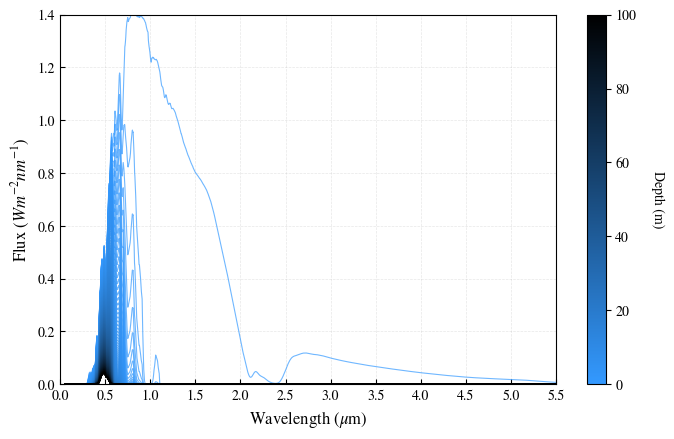

In [19]:
# Step 3: Calculate water-attenuated fluxes for multiple depths
depths = np.linspace(0, 100, 500)  # 500 depth points from 0 to 100 meters
import matplotlib.colors as mcolors
# Create a figure for plotting
plt.figure(figsize=(8, 4.8))

# Normalize color mapping to the depth range
norm = plt.Normalize(vmin=depths.min(), vmax=depths.max())

# Use the reversed colormap
colors = [(0.2, 0.6, 1), (0, 0, 0)]   # RGB values for light red to dark purple
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)

# Loop over depths to calculate and plot the attenuated flux
for depth in depths:
    wattenuated_flux = (attenuated_flux) * np.exp(-interpolated_absorption * depth)
    plt.plot(processed_wavelengths_microns, wattenuated_flux/1e10, color=cmap(norm(depth)), alpha=0.7,
         linewidth=0.8)

#plt.plot(processed_wavelengths_microns, wattenuated_flux)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Depth (m)', rotation=270, labelpad=20)

tick_spacing = 0.5
ax = plt.gca()
ax.tick_params(direction="in")
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# Plotting labels and title
plt.xlabel("Wavelength ($\mu$m)", fontsize=12)
plt.ylabel("Flux ($W m^{-2} nm^{-1}$)", fontsize=12)
plt.xlim(0, 5.5)
plt.ylim(0, 1.4)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)
plt.savefig('/Users/leonardogacituasantos/exoplanet_photosynthesis/jupyter_notebooks/Figures for report/Water_Spectrums.jpg', dpi=600, format='jpg')

plt.show()


In [ ]:
wattenuated_flux

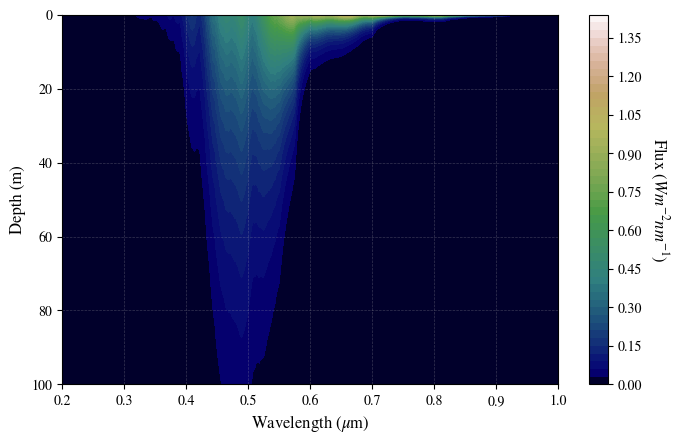

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming 'processed_wavelengths_microns' and 'attenuated_flux' are defined

# Define depths
depths = np.linspace(0, 100, 1000)  # 500 depth points from 0 to 100 meters

# Create a 2D array to hold the flux values for each depth and wavelength
flux_matrix = np.zeros((len(depths), len(processed_wavelengths_microns)))

# Calculate flux at each depth
for i, depth in enumerate(depths):
    wattenuated_flux = (attenuated_flux/1e10) * np.exp(-interpolated_absorption * depth)
    flux_matrix[i, :] = wattenuated_flux

# Normalize the flux_matrix so the colormap starts at 0
norm = mcolors.Normalize(vmin=0, vmax=np.max(flux_matrix))

# Create a custom colormap that transitions from black to viridis
viridis = plt.get_cmap('gist_earth')
viridis_colors = viridis(np.linspace(0, 1, 256))

# Insert black at the beginning of the colormap
new_colors = np.vstack(([0, 0, 0, 0], viridis_colors))

# Create a new colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_black_viridis', new_colors)

# Create the contour plot
plt.figure(figsize=(8, 4.8))
X, Y = np.meshgrid(processed_wavelengths_microns, depths)
contour = plt.contourf(X, Y, flux_matrix, levels=50, cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(contour)
cbar.set_label('Flux ($W m^{-2} nm^{-1}$)', fontsize=12 , rotation=270, labelpad=20)

# Plotting labels and title
plt.xlabel("Wavelength ($\mu$m)", fontsize=12)
plt.ylabel("Depth (m)", fontsize=12)
plt.gca().invert_yaxis()  # Depth increases downwards
plt.xlim(0.2, 1)
plt.ylim(100,0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)
#plt.savefig('/Users/leonardogacituasantos/exoplanet_photosynthesis/jupyter_notebooks/Figures for report/Depth_Spectrums.jpg', dpi=600, format='jpg')
plt.show()


In [21]:
import sys
sys.path.append('/Users/leonardogacituasantos/exoplanet_photosynthesis/python_files/Ifigeneia_code')
import numpy as np
import matplotlib.pyplot as plt
import Thermo_antenna as thermo
import PSII_params
import TypeII_params
from scipy.constants import Boltzmann as kB

# Load the K2-18b attenuated spectrum
spectrum_file = '/Users/leonardogacituasantos/exoplanet_photosynthesis/data_files/processed_data/new_atten_spectrum' 
l, irad_y = np.loadtxt(spectrum_file, unpack=True)

T = PSII_params.T

In [ ]:
irad_y_with

In [ ]:
attenuated_flux

In [22]:
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import Thermo_antenna as thermo
import PSII_params
import TypeII_params
from scipy.constants import Boltzmann as kB
import matplotlib.ticker as ticker


matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

# PSII Parameters
G_params_PSII = PSII_params.G_params    
Size_params_PSII = PSII_params.Size_params
k_params_PSII = PSII_params.k_params

# Load the spectra files

# Load the spectra
l_with, irad_y_with = processed_wavelengths, attenuated_flux
irad_y_with = irad_y_with/1e10
l_with = l_with/10

T = PSII_params.T

# Define parameters for Beer-Lambert law

depths = np.linspace(0, 100, 1000)
# Initialize lists to store electron output rates for both spectra and both systems (PSII and Type II)
electron_output_rates_psii_with_atmosphere = []
electron_output_rates_psii_without_atmosphere = []
electron_output_rates_typeii_with_atmosphere = []
electron_output_rates_typeii_without_atmosphere = []

for i, depth in enumerate(depths):
    nwattenuated_flux = irad_y_with * np.exp(-interpolated_absorption * depth)
    flux_matrix[i, :] = nwattenuated_flux
    F_D_with = flux_matrix[i, :] 
     # PSII Model Calculation using the attenuated flux
    model_PSII_with = thermo.antenna(l_with, F_D_with, G_params_PSII, Size_params_PSII, k_params_PSII, T)
    electron_output_rates_psii_with_atmosphere.append(model_PSII_with['nu_e'])

    # Type II Model Calculation using the attenuated flux
    model_TypeII_with = thermo.antenna_TypeII(l_with, F_D_with, G_params_TypeII, Size_params_TypeII, k_params_TypeII, T)
    electron_output_rates_typeii_with_atmosphere.append(model_TypeII_with['nu_e'])


# Create a figure and axis for plotting
plt.figure(figsize=(6, 4.8))

# Plot Electron Output Rate for PSII with atmosphere
plt.plot(depths, electron_output_rates_psii_with_atmosphere, color='blue', label='PSII', linewidth=0.6)

# Plot Electron Output Rate for Type II with atmosphere
plt.plot(depths, electron_output_rates_typeii_with_atmosphere, color='red', label='Type II', linewidth=0.6)


# Adding labels and title
plt.xlabel('Depth (m)')

plt.ylabel('Output Rate (s$^{-1}$)')
# Adding legend
plt.legend()

# Adding grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)
tick_spacing = 10
ax = plt.gca()
ax.tick_params(direction="in")
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax.set_yscale('log')
plt.ylim(0.0001, 100)
plt.xlim(0,40)
# Showing the plot
#plt.savefig('/Users/leonardogacituasantos/exoplanet_photosynthesis/jupyter_notebooks/Figures for report/water_outputs.jpg', dpi=600, format='jpg')

plt.show()


NameError: name 'G_params_TypeII' is not defined

In [ ]:
l_with

In [ ]:
irad_y_with

In [ ]:
processed_wavelengths